# Keras Feedforward 1 - lab (solutions)

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras import models, layers, Input, Model
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [2]:
def plot_loss(history):
    """ Plot training, test loss. """

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'])
    plt.show();

### Read and preprocess the data.

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/grbruns/cst383/master/1994-census-summary.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   usid            32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       30725 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      30718 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  hours_per_week  32561 non-null  int64 
 14  native_country  31978 non-null  object
 15  label           32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [5]:
df['relationship'].value_counts()

Husband           13193
Not_in_family      8305
Own_child          5068
Unmarried          3446
Wife               1568
Other_relative      981
Name: relationship, dtype: int64

In [6]:
df['label'].value_counts()

<=50K    24720
>50K      7841
Name: label, dtype: int64

Let's try to predict whether income is > 50K using age, education_num, sex, and race.

We'll need to do a little preprocessing.

In [11]:
predictors = ['age', 'education_num', 'sex', 'race', 'relationship']
target = 'label'
dfp = pd.get_dummies(df[predictors], drop_first=True)
column_names = dfp.columns

Sanity check.

In [8]:
dfp.head()

,age,education_num,sex_Male,race_Asian_Pac_Islander,race_Black,race_Other,race_White,relationship_Not_in_family,relationship_Other_relative,relationship_Own_child,relationship_Unmarried,relationship_Wife
0,39,13,1,0,0,0,1,1,0,0,0,0
1,50,13,1,0,0,0,1,0,0,0,0,0
2,38,9,1,0,0,0,1,1,0,0,0,0
3,53,7,1,0,1,0,0,0,0,0,0,0
4,28,13,0,0,1,0,0,0,0,0,0,1


Train/test split, then scale the predictors.

In [13]:
X = dfp.values
y = (df[target] == '>50K').astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [14]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Sanity check.

In [ ]:
print(X_train.shape)
print(y_train.shape)

(24420, 12)
(24420,)


### Logistic regression with a neural net

In [15]:
# delete any old models
K.clear_session()

Build and compile the model.

In [18]:
input_size = X.shape[1]
model = models.Sequential()
model.add(Input(shape=(input_size,)))
model.add(layers.Dense(1, activation='sigmoid'))

Alternative, using InputLayer instead of Input.

In [20]:
input_size = X.shape[1]
model = models.Sequential()
model.add(layers.InputLayer(input_shape=(input_size,)))
model.add(layers.Dense(1, activation='sigmoid'))

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 13 (52.00 Byte)
Trainable params: 13 (52.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

Save the initial weights for convenient reuse later.

(See https://stackoverflow.com/questions/40496069/reset-weights-in-keras-layer)

In [23]:
weights = model.get_weights()

Train the model.

In [24]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
535/535 [==============================] - 2s 2ms/step - loss: 0.5284 - accuracy: 0.7242 - val_loss: 0.4354 - val_accuracy: 0.8048
Epoch 2/10
535/535 [==============================] - 1s 2ms/step - loss: 0.4159 - accuracy: 0.8105 - val_loss: 0.3987 - val_accuracy: 0.8172
Epoch 3/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3953 - accuracy: 0.8154 - val_loss: 0.3872 - val_accuracy: 0.8193
Epoch 4/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3878 - accuracy: 0.8168 - val_loss: 0.3821 - val_accuracy: 0.8204
Epoch 5/10
535/535 [==============================] - 2s 3ms/step - loss: 0.3842 - accuracy: 0.8175 - val_loss: 0.3794 - val_accuracy: 0.8198
Epoch 6/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3822 - accuracy: 0.8174 - val_loss: 0.3779 - val_accuracy: 0.8206
Epoch 7/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3811 - accuracy: 0.8176 - val_loss: 0.3768 - val_accuracy: 0.8208
Epoch 

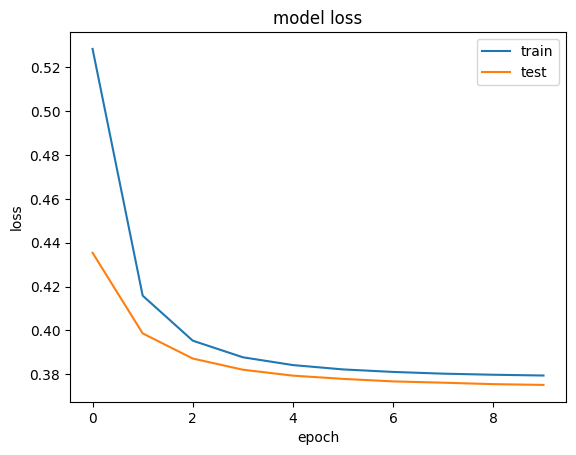

In [25]:
plot_loss(history)

Compute test accuracy.

In [ ]:
y_pred = (model.predict(X_test)[:,0] > 0.5).astype(int)
print('test accuracy with neural net: {:.3f}'.format((y_pred == y_test).mean()))

test accuracy with neural net: 0.819


### Logistic regression with Scikit-Learn.

In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print('test accuracy with sklearn: {:.3f}'.format(clf.score(X_test, y_test)))

test accuracy with sklearn: 0.819


### Play with number of epochs in neural net.

In [ ]:
# it looks like only about 5 epochs are needed
model.set_weights(weights)
history = model.fit(X_train, y_train, batch_size=32, epochs=5, validation_split=0.3)

Epoch 1/5
535/535 [==============================] - 2s 4ms/step - loss: 0.5715 - accuracy: 0.7117 - val_loss: 0.4632 - val_accuracy: 0.7958
Epoch 2/5
535/535 [==============================] - 2s 4ms/step - loss: 0.4343 - accuracy: 0.8099 - val_loss: 0.4141 - val_accuracy: 0.8134
Epoch 3/5
535/535 [==============================] - 2s 4ms/step - loss: 0.4058 - accuracy: 0.8164 - val_loss: 0.3978 - val_accuracy: 0.8183
Epoch 4/5
535/535 [==============================] - 2s 4ms/step - loss: 0.3948 - accuracy: 0.8181 - val_loss: 0.3901 - val_accuracy: 0.8197
Epoch 5/5
535/535 [==============================] - 2s 4ms/step - loss: 0.3892 - accuracy: 0.8190 - val_loss: 0.3856 - val_accuracy: 0.8195


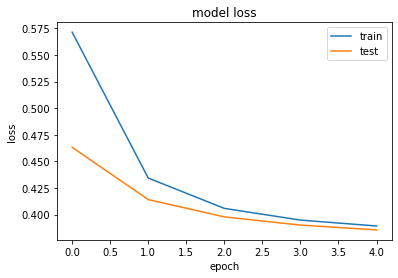

In [ ]:
plot_loss(history)

### A classifier with a single hidden layer of 10 neurons.  ReLU activation function.

In [26]:
model = models.Sequential()
model.add(Input(shape=(input_size,)))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [27]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                130       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 141 (564.00 Byte)
Trainable params: 141 (564.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


During training, validation accuracy seems to stop improving, but validation loss keeps improving.  

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Notice how the plot is a little different from before.

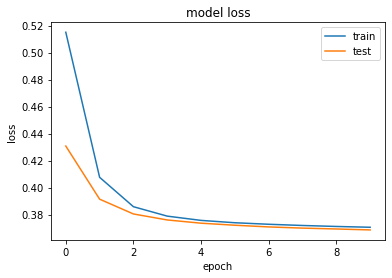

In [ ]:
plot_loss(history)

In [ ]:
y_pred = (model.predict(X_test)[:,0] > 0.5).astype(int)
print('test accuracy with neural net: {:.3f}'.format((y_pred == y_test).mean()))

test accuracy with neural net: 0.826


### Play with batch size

In [ ]:
model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=16, epochs=5, validation_split=0.3)

Epoch 1/5
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3703 - accuracy: 0.8234 - val_loss: 0.3678 - val_accuracy: 0.8279
Epoch 2/5
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3695 - accuracy: 0.8247 - val_loss: 0.3670 - val_accuracy: 0.8281
Epoch 3/5
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3690 - accuracy: 0.8228 - val_loss: 0.3670 - val_accuracy: 0.8291
Epoch 4/5
1069/1069 [==============================] - 4s 4ms/step - loss: 0.3685 - accuracy: 0.8241 - val_loss: 0.3664 - val_accuracy: 0.8283
Epoch 5/5
1069/1069 [==============================] - 4s 3ms/step - loss: 0.3682 - accuracy: 0.8245 - val_loss: 0.3663 - val_accuracy: 0.8291


In [ ]:
y_pred = (model.predict(X_test)[:,0] > 0.5).astype(int)
print('test accuracy with neural net: {:.3f}'.format((y_pred == y_test).mean()))

test accuracy with neural net: 0.827


### A hidden layer of 50 neurons.

In [ ]:
model = models.Sequential()
model.add(Input(shape=(input_size,)))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
535/535 [==============================] - 1s 2ms/step - loss: 0.4741 - accuracy: 0.7673 - val_loss: 0.4009 - val_accuracy: 0.8215
Epoch 2/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3899 - accuracy: 0.8176 - val_loss: 0.3787 - val_accuracy: 0.8231
Epoch 3/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3779 - accuracy: 0.8186 - val_loss: 0.3732 - val_accuracy: 0.8242
Epoch 4/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3739 - accuracy: 0.8194 - val_loss: 0.3710 - val_accuracy: 0.8239
Epoch 5/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3717 - accuracy: 0.8205 - val_loss: 0.3695 - val_accuracy: 0.8256
Epoch 6/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3704 - accuracy: 0.8204 - val_loss: 0.3683 - val_accuracy: 0.8272
Epoch 7/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3692 - accuracy: 0.8208 - val_loss: 0.3675 - val_accuracy: 0.8254
Epoch 

In [ ]:
y_pred = (model.predict(X_test)[:,0] > 0.5).astype(int)
print('test accuracy with neural net: {:.3f}'.format((y_pred == y_test).mean()))

test accuracy with neural net: 0.828


### Two hidden layers of 20 neurons each

In [ ]:
model = models.Sequential()
model.add(Input(shape=(input_size,)))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.3)

Epoch 1/10
535/535 [==============================] - 1s 2ms/step - loss: 0.5056 - accuracy: 0.7582 - val_loss: 0.4249 - val_accuracy: 0.7913
Epoch 2/10
535/535 [==============================] - 1s 2ms/step - loss: 0.4009 - accuracy: 0.8104 - val_loss: 0.3829 - val_accuracy: 0.8223
Epoch 3/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3781 - accuracy: 0.8198 - val_loss: 0.3741 - val_accuracy: 0.8253
Epoch 4/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8218 - val_loss: 0.3715 - val_accuracy: 0.8246
Epoch 5/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3708 - accuracy: 0.8219 - val_loss: 0.3699 - val_accuracy: 0.8257
Epoch 6/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3695 - accuracy: 0.8227 - val_loss: 0.3689 - val_accuracy: 0.8271
Epoch 7/10
535/535 [==============================] - 1s 2ms/step - loss: 0.3686 - accuracy: 0.8239 - val_loss: 0.3680 - val_accuracy: 0.8269
Epoch 

In [ ]:
y_pred = (model.predict(X_test)[:,0] > 0.5).astype(int)
print('test accuracy with neural net: {:.3f}'.format((y_pred == y_test).mean()))

test accuracy with neural net: 0.827
